    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       1  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


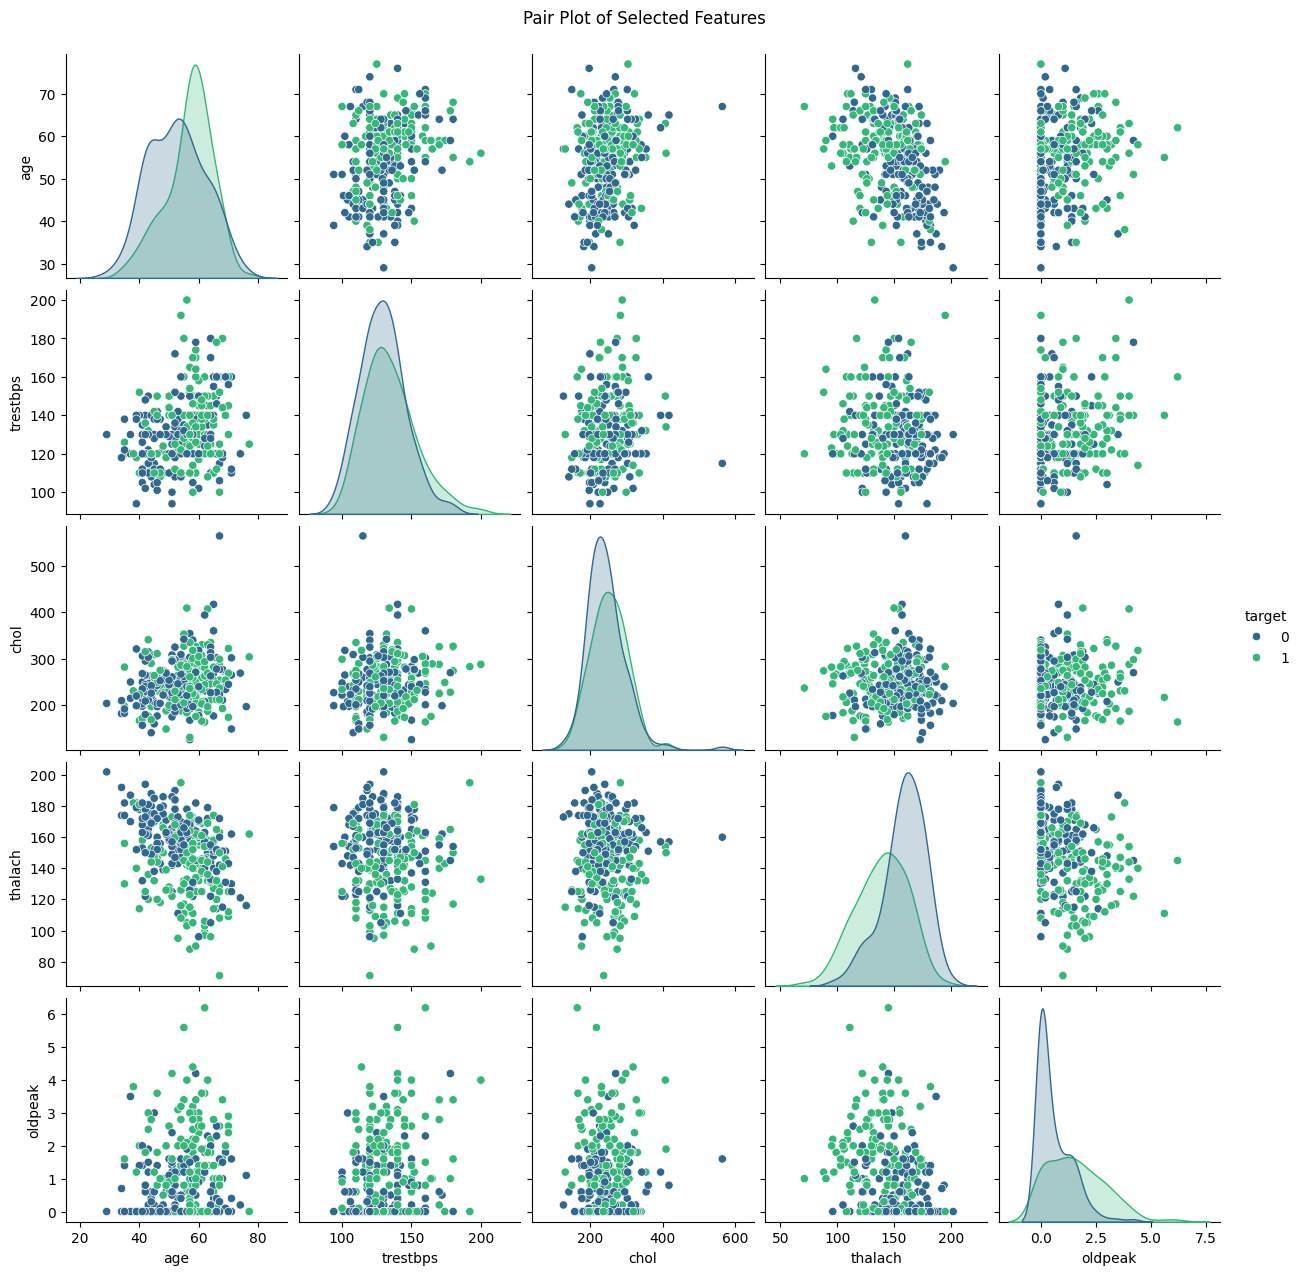

<ipython-input-7-87844d44b4d4>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='target', y=feature, palette='viridis')


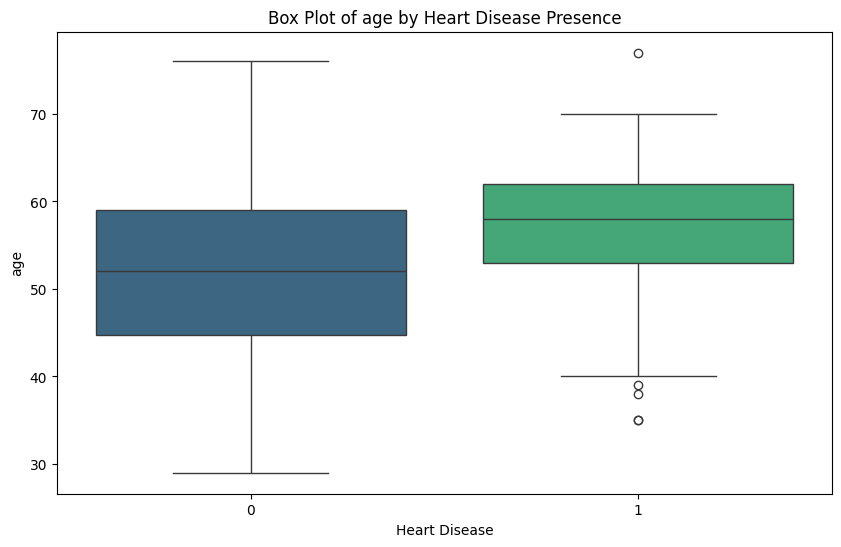

<ipython-input-7-87844d44b4d4>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='target', y=feature, palette='viridis')


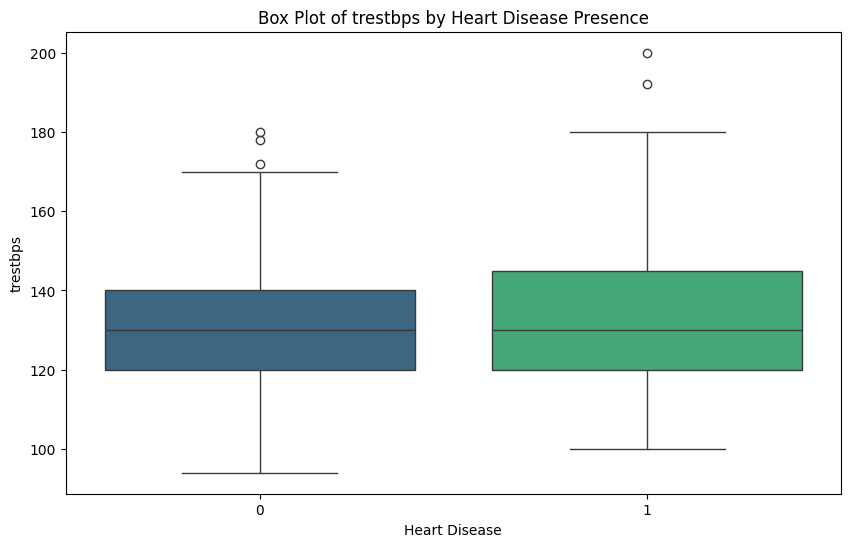

<ipython-input-7-87844d44b4d4>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='target', y=feature, palette='viridis')


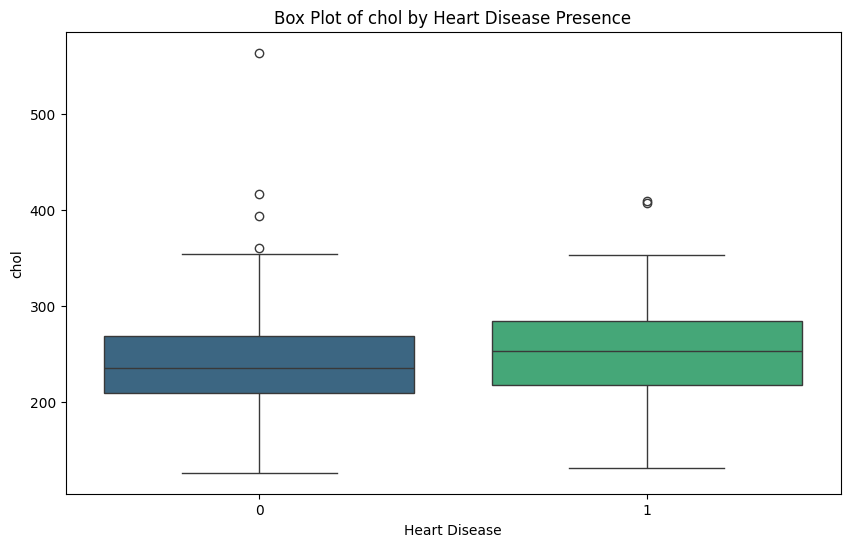

<ipython-input-7-87844d44b4d4>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='target', y=feature, palette='viridis')


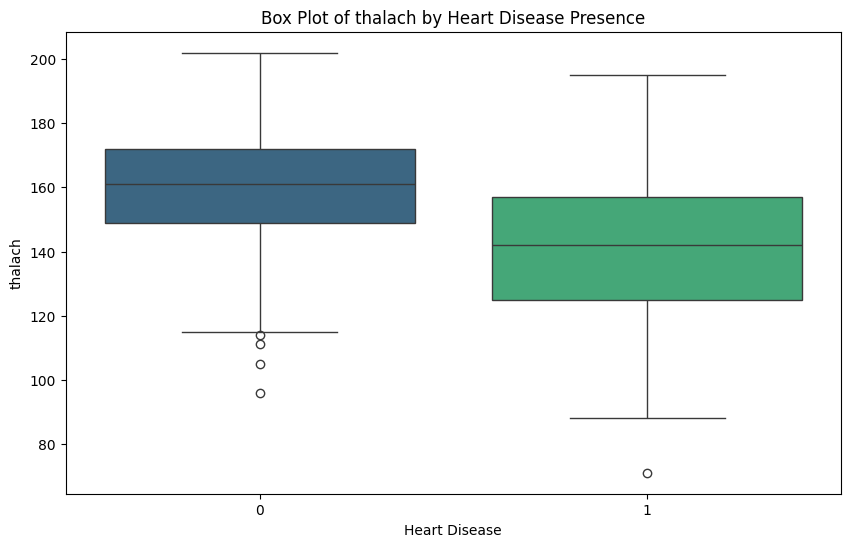

<ipython-input-7-87844d44b4d4>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='target', y=feature, palette='viridis')


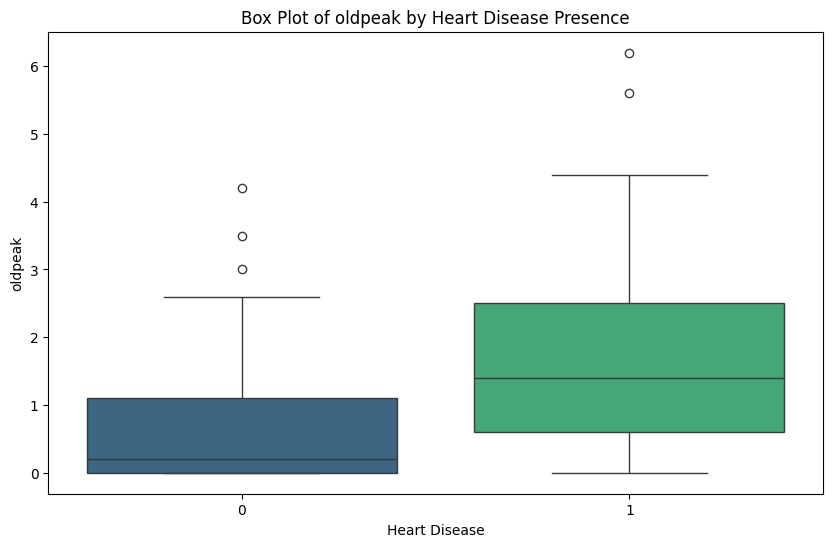

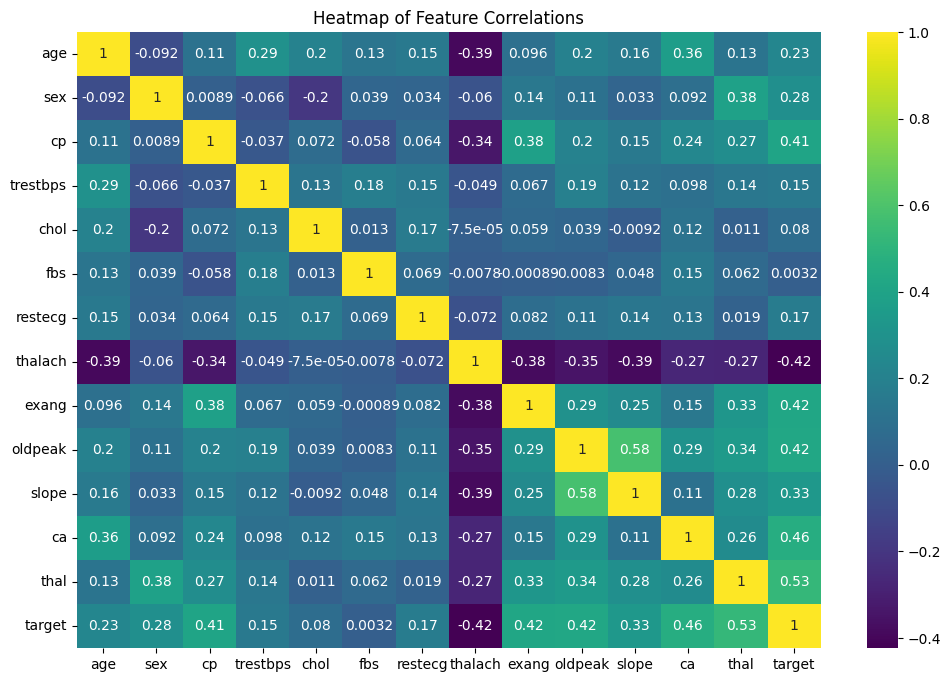

Accuracy for N=1: 0.8666666666666667
Accuracy for N=2: 0.8333333333333334
Accuracy for N=3: 0.8833333333333333
Accuracy for N=4: 0.8666666666666667
Accuracy for N=5: 0.8333333333333334
Accuracy for N=6: 0.8166666666666667
Accuracy for N=7: 0.8833333333333333
Accuracy for N=8: 0.8666666666666667
Accuracy for N=9: 0.8666666666666667
Accuracy for N=10: 0.8333333333333334


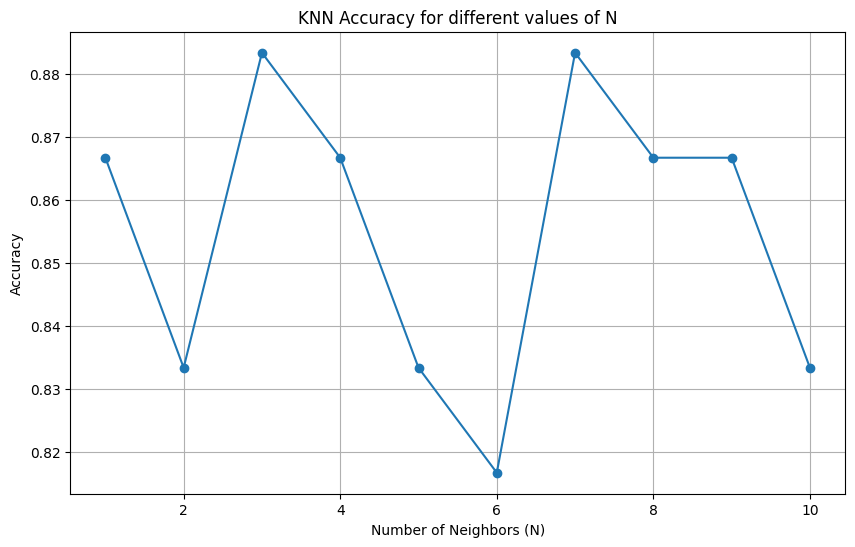

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the Heart Disease Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
    'oldpeak', 'slope', 'ca', 'thal', 'target'
]
data = pd.read_csv(url, header=None, names=column_names)

# Handle missing values indicated by '?'
data.replace('?', pd.NA, inplace=True)
data.dropna(inplace=True)
data = data.astype(float)

# Convert target variable to binary classification
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

# Display the first few rows of the dataset
print(data.head())

# Basic data visualization for a few features
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Pair plot
sns.pairplot(data, vars=features, hue='target', palette='viridis')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

# Box plots
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='target', y=feature, palette='viridis')
    plt.title(f'Box Plot of {feature} by Heart Disease Presence')
    plt.xlabel('Heart Disease')
    plt.ylabel(feature)
    plt.show()

# Heatmap of correlations
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Heatmap of Feature Correlations')
plt.show()

# Prepare the data for training
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN classifier and evaluate for different values of N
accuracy_scores = []

for n in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Accuracy for N={n}: {accuracy}")

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracy_scores, marker='o')
plt.title('KNN Accuracy for different values of N')
plt.xlabel('Number of Neighbors (N)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


wine dataset